### Loading Data

In [1]:
import numpy as np
import pandas as pd
datas = np.load('E_origninal.npy')
numero_senseur = np.load('numeroDesCapteur.npy')

        
    
    

### Imputation by the precedent value 

In [2]:
#naive imputation by the precedent value
def imputation_precedent(data):
    m,n = data.shape
    for i in range(m):
        for j in range(n):
            if data[i,j] == -1:
                data[i,j] = data[i,j-1]
    return None

imputation_precedent(datas)

datas_pandas = pd.DataFrame(datas)
datas_pandas.index = numero_senseur

nb_cap = 1 # datas.shape[0]
voisin = np.load('tousLesVoisinsDeTouslesPionts.npy',allow_pickle = True)
datas_pandas.head()



,0,1,2,3,4,5,6,7,8,9,...,33328,33329,33330,33331,33332,33333,33334,33335,33336,33337
158895,77,83,74,72,79,86,91,74,74,75,...,84,84,84,84,65,65,65,65,65,68
187509,12,12,12,16,16,31,31,31,31,31,...,32,32,32,32,32,32,32,32,32,32
195041,52,56,55,58,53,52,54,54,52,58,...,46,46,46,46,46,46,46,46,46,46
195552,0,0,0,0,0,0,0,0,0,13,...,38,38,38,27,27,19,19,19,19,19
209827,46,47,47,47,50,48,43,46,50,49,...,63,63,63,58,58,56,56,56,56,85


In [3]:
print(voisin[:3])

[list([158895, 158924, 158744, 172602, 173118, 158715])
 list([187509, 187324, 187377, 203742, 203716, 184595, 187430, 187456, 198113, 187350, 187403, 187483, 184621, 184649, 184675, 180709, 180735])
 list([195041, 193376, 206396, 206422, 195843, 195015, 195790, 195817, 193430, 206343, 206369])]


### Creating a table of the sensor to modelizse with his neighbor's data 

In [4]:
#creating a table of the sensor to modelizse with his neighbor's data 
#for i in range(nb_cap):
cap = voisin[0]
model_cap = pd.DataFrame(columns = np.arange(datas.shape[1]))
for ind in range(len(cap)):
    model_cap.loc[ind] = datas_pandas.loc[cap[ind]]

#numerate neighbor sensor and efface their sensor number
model_cap = model_cap.astype(int)

model_cap




,0,1,2,3,4,5,6,7,8,9,...,33328,33329,33330,33331,33332,33333,33334,33335,33336,33337
0,77,83,74,72,79,86,91,74,74,75,...,84,84,84,84,65,65,65,65,65,68
1,65,65,70,70,68,66,68,70,70,70,...,41,41,69,69,69,69,69,69,69,81
2,84,79,79,84,95,87,82,86,91,82,...,57,57,57,57,89,86,86,86,86,91
3,35,34,33,34,33,34,37,36,36,33,...,33,33,33,33,38,35,35,35,35,35
4,26,27,29,29,23,33,31,27,29,29,...,33,33,33,33,33,33,33,33,33,33
5,90,91,90,96,90,90,91,88,91,94,...,82,82,128,82,81,67,67,67,67,75


### Adding random gaussian noise manually to the p% of the data in the model sensor as a trial

In [5]:
#adding gaussian noise manually
#sampling of p% of model_capets and creation of label
np.random.seed(42)
p= 0.4
model_sensor = model_cap.iloc[0,:].copy()
sample = np.random.choice(range(model_sensor.shape[0]),int(p*model_sensor.shape[0]),replace= False)
sample = np.unique(sample)
label = np.zeros(model_sensor.shape)
print(sample, sample.shape)
print(np.mean(model_sensor))
#adding gaussien noise to p% of the model_capet, mu mean, sigma ecart-type

mu = 0.5* np.mean(model_sensor)
sigma = 0.3*np.mean(model_sensor)

for i in range(len(sample)):
    label[sample[i]] = 1
    model_sensor[sample[i]] += np.random.normal(mu,sigma)

 # verifacation whether we have p% model_cap
print(label,label.shape)
print(model_sensor,model_sensor.shape)

#replace sensor data in the original data

model_cap.iloc[0,:] = model_sensor
#model_cap
model_cap


[    3     4     6 ... 33332 33333 33336] (13335,)
81.05309256704061
[0. 0. 0. ... 0. 1. 0.] (33338,)
0         77
1         83
2         74
3        113
4        113
        ... 
33333    104
33334     65
33335     65
33336    109
33337     68
Name: 0, Length: 33338, dtype: int32 (33338,)


,0,1,2,3,4,5,6,7,8,9,...,33328,33329,33330,33331,33332,33333,33334,33335,33336,33337
0,77,83,74,113,113,86,145,93,117,75,...,84,84,132,84,162,104,65,65,109,68
1,65,65,70,70,68,66,68,70,70,70,...,41,41,69,69,69,69,69,69,69,81
2,84,79,79,84,95,87,82,86,91,82,...,57,57,57,57,89,86,86,86,86,91
3,35,34,33,34,33,34,37,36,36,33,...,33,33,33,33,38,35,35,35,35,35
4,26,27,29,29,23,33,31,27,29,29,...,33,33,33,33,33,33,33,33,33,33
5,90,91,90,96,90,90,91,88,91,94,...,82,82,128,82,81,67,67,67,67,75


In [6]:
#Understanding of the data
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
model_capT = model_cap.transpose()
model_capT.hist()

#visualisation of covariance matrix and correlation
scatter_matrix(model_capT)
plt.show()




<Figure size 640x480 with 6 Axes>

<Figure size 640x480 with 36 Axes>

### Creating new feature in the model

In [8]:
#replace data by difference and difference square
model_diff = pd.DataFrame(columns = np.arange(datas.shape[1]))
for ind in range(1,len(cap)):
    #model_diff.loc['cap{}-cap0'.format(str(ind))] = np.abs(datas_pandas.loc[cap[ind]] - datas_pandas.iloc[0])
    model_diff.loc['cap{}-cap0'.format(str(ind))] = (model_cap.loc[ind] - model_cap.iloc[0])
    #model_diff.loc['cap{}-cap0 square'.format(str(ind))] = (datas_pandas.loc[cap[ind]]
                                                                #- datas_pandas.iloc[0])**2


model_diff = model_diff.astype(int)
model_diff = model_diff.transpose()
model_diff

,cap1-cap0,cap2-cap0,cap3-cap0,cap4-cap0,cap5-cap0
0,-12,7,-42,-51,13
1,-18,-4,-49,-56,8
2,-4,5,-41,-45,16
3,-43,-29,-79,-84,-17
4,-45,-18,-80,-90,-23
...,...,...,...,...,...
33333,-35,-18,-69,-71,-37
33334,4,21,-30,-32,2
33335,4,21,-30,-32,2
33336,-40,-23,-74,-76,-42


### Visualisation of histogram,covariance matrix and correlation heat map

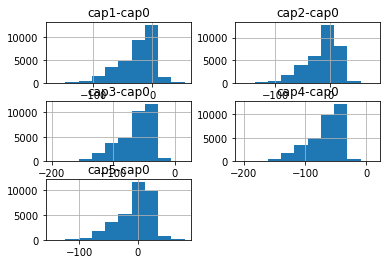

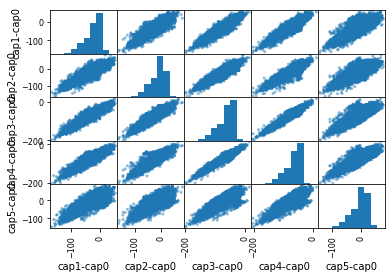

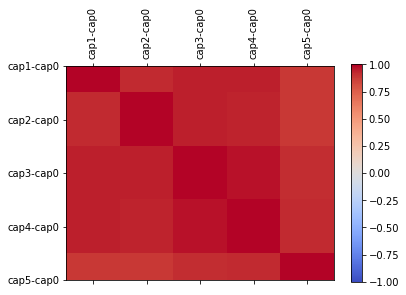

In [9]:
#visualisation of histogram and covariance matrix
model_diff.hist()
scatter_matrix(model_diff)
plt.show()

#Correlation heat map
corr = model_diff.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(model_diff.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(model_diff.columns)
ax.set_yticklabels(model_diff.columns)
plt.show()



### Creating training set and test set

In [10]:
# merge two tables
#model = pd.concat([model_cap.transpose(),model_diff],axis=1)
model = model_diff
model

,cap1-cap0,cap2-cap0,cap3-cap0,cap4-cap0,cap5-cap0
0,-12,7,-42,-51,13
1,-18,-4,-49,-56,8
2,-4,5,-41,-45,16
3,-43,-29,-79,-84,-17
4,-45,-18,-80,-90,-23
...,...,...,...,...,...
33333,-35,-18,-69,-71,-37
33334,4,21,-30,-32,2
33335,4,21,-30,-32,2
33336,-40,-23,-74,-76,-42


In [11]:
from sklearn.model_selection import train_test_split
trainset_perc = 0.7

#limiting data to have a smaller dataset to test

#time_limit = datas.shape[1]
time_limit = 15000

X = model.values[:time_limit,:]
y = label[:time_limit]
train_size = int(trainset_perc*time_limit)

#X_outliers = model_sensor.values[:time_limit]
#X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size = testset_perc)
X_train,y_train = X[:train_size,:],y[:train_size]
X_test,y_test = X[train_size:,:],y[train_size:]


print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(10500, 5) (4500, 5) (10500,) (4500,)


In [12]:
def plot_confusion_matrix(cm, classes,
                           normalize=False,
                           title='Confusion matrix',
                           cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

classes = ['Outlier','Normal']

### One class classification SVM

In [13]:
'''
from sklearn.svm import OneClassSVM



clf = OneClassSVM(kernel='rbf',gamma='auto').fit(X_train)
y_pred = clf.predict(X_test)
#y_pred[y_pred==-1] = 0 # substitute -1 by 0

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
#y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
#n_error_outlier = y_pred_outliers[y_pred_outliers == 1].size

print(y_pred,y_pred.shape)

print(y_train,y_train.shape)


'''
                    

"\nfrom sklearn.svm import OneClassSVM\n\n\n\nclf = OneClassSVM(kernel='rbf',gamma='auto').fit(X_train)\ny_pred = clf.predict(X_test)\n#y_pred[y_pred==-1] = 0 # substitute -1 by 0\n\ny_pred_train = clf.predict(X_train)\ny_pred_test = clf.predict(X_test)\n#y_pred_outliers = clf.predict(X_outliers)\nn_error_train = y_pred_train[y_pred_train == -1].size\nn_error_test = y_pred_test[y_pred_test == -1].size\n#n_error_outlier = y_pred_outliers[y_pred_outliers == 1].size\n\nprint(y_pred,y_pred.shape)\n\nprint(y_train,y_train.shape)\n\n\n"

### SVM kernel rbf

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svclassifier = SVC(kernel='rbf',probability = True, random_state=42)
svclassifier.fit(X_train, y_train)
y_pred_rbf = svclassifier.predict(X_test)


score_rbf = svclassifier.score(X_test,y_test)
print("The accuracy of rbf is : %f"%score_rbf)

print(confusion_matrix(y_test,y_pred_rbf))
print(classification_report(y_test,y_pred_rbf))

plt.figure()
plot_confusion_matrix(confusion_matrix(y_test,y_pred_rbf),classes = classes, normalize = True, title = 'Normalized confusion matrix')


D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### SVM linear

The accuracy of linear model is : 0.883778
[[2552  118]
 [ 405 1425]]
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      2670
         1.0       0.92      0.78      0.84      1830

    accuracy                           0.88      4500
   macro avg       0.89      0.87      0.88      4500
weighted avg       0.89      0.88      0.88      4500

Normalized confusion matrix
[[0.95580524 0.04419476]
 [0.22131148 0.77868852]]


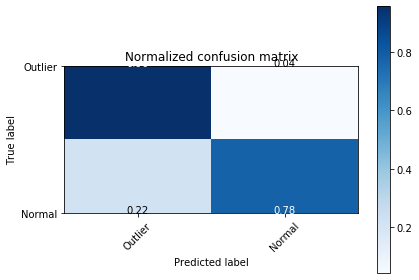

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import itertools

svclassifier = SVC(kernel='linear',gamma='auto')
svclassifier.fit(X_train, y_train)
y_pred_lin = svclassifier.predict(X_test)


score_lin = svclassifier.score(X_test,y_test)
print("The accuracy of linear model is : %f"%score_lin)

print(confusion_matrix(y_test,y_pred_lin))
print(classification_report(y_test,y_pred_lin))
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test,y_pred_lin),classes = classes, normalize = True, title = 'Normalized confusion matrix')


### Plot of ROC curve

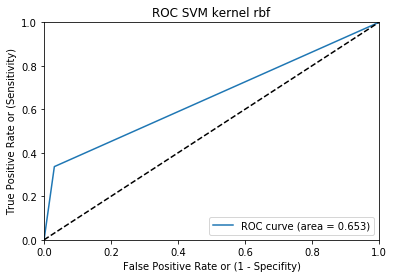

In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rbf)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('ROC SVM kernel rbf')
plt.legend(loc="lower right")



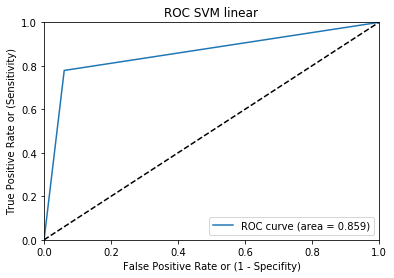

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lin)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('ROC SVM linear')
plt.legend(loc="lower right")

